In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import plot_partial_dependence

In [2]:
# feature importance plot
def plot_feature_importances(feature_importances, column_names, color='b'):
    sort_idx = np.argsort(np.abs(feature_importances))
    plt.figure(num=None, figsize=(8, 8))
    plt.barh(np.arange(len(feature_importances)), feature_importances[sort_idx], color=color)
    plt.yticks(np.arange(len(feature_importances)), column_names[sort_idx])
    plt.title('Feature importances')
    plt.show()

In [3]:
pcmf = pd.read_csv('public_chargers_metrics_and_features.csv', sep=',', encoding='utf8', index_col=0)  
pcmf

,operatorname,geom,lat,lng,power,municipal_typologie,population_hect,occupied_ratio
evseid,,,,,,,,
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,60.00,3,8,0.000823
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,60.00,3,9,0.000823
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,60.00,3,8,0.000823
CH*E4U*E00574,easy4you,010100002008080000B202F8EECBC5444158190D944FA4...,1.221712e+06,2.722712e+06,22.08,7,3,0.000000
CH*E4U*E00574,easy4you,010100002008080000B202F8EECBC5444158190D944FA4...,1.221712e+06,2.722712e+06,22.08,7,3,0.000000
...,...,...,...,...,...,...,...,...
CH*SWIEE11107,Swisscharge,010100002008080000789AA1C764004541028DB85EC2EE...,1.175234e+06,2.752714e+06,150.00,6,44,0.001534
CH*SWIEE11107,Swisscharge,010100002008080000789AA1C764004541028DB85EC2EE...,1.175234e+06,2.752714e+06,150.00,6,44,0.001534
CH*CCI*E20048,Move,01010000200808000092F2684C5F6043419D413BAF1C04...,1.180701e+06,2.539711e+06,22.00,4,23,0.011552


------------------------------------------------------------------

In [4]:
y_df = pcmf.loc[:, 'occupied_ratio']     # extract occupied_ratio
X_df = pcmf.loc[:, ['power', 'municipal_typologie', 'population_hect']]
y_df = y_df.fillna(0)
X_df['power'] = X_df['power'].fillna(-1)
#X_df['power'] = X_df['power'].fillna(0)
#X_df['municipal_typologie'] = X_df['municipal_typologie'].fillna(-1)
#X_df['population_hect'] = X_df['population_hect'].fillna(-1)

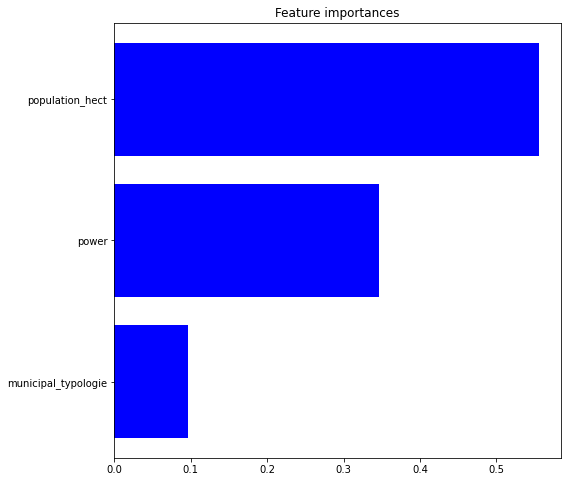

In [5]:
#rf = RandomForestRegressor()
rf = ExtraTreesRegressor()
rf.fit(X_df, y_df)
plot_feature_importances(rf.feature_importances_, X_df.columns)

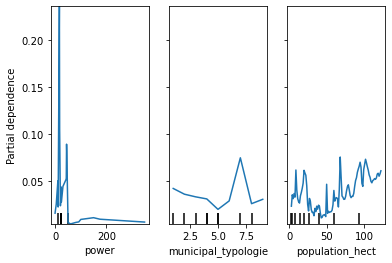

In [6]:
# feature dependence plot
plot_partial_dependence(
    rf,
    X_df,
    features=['power', 'municipal_typologie', 'population_hect'])

fig = plt.gcf()
fig.subplots_adjust(hspace=0.8)
plt.show()


In [7]:
fig.savefig('ExtraTreesRegressor.png')

### Not Null

In [8]:
pcmfNa = pcmf[pcmf['power'].notna()]
pcmfNa

,operatorname,geom,lat,lng,power,municipal_typologie,population_hect,occupied_ratio
evseid,,,,,,,,
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,60.00,3,8,0.000823
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,60.00,3,9,0.000823
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,60.00,3,8,0.000823
CH*E4U*E00574,easy4you,010100002008080000B202F8EECBC5444158190D944FA4...,1.221712e+06,2.722712e+06,22.08,7,3,0.000000
CH*E4U*E00574,easy4you,010100002008080000B202F8EECBC5444158190D944FA4...,1.221712e+06,2.722712e+06,22.08,7,3,0.000000
...,...,...,...,...,...,...,...,...
CH*SWIEE11107,Swisscharge,010100002008080000789AA1C764004541028DB85EC2EE...,1.175234e+06,2.752714e+06,150.00,6,44,0.001534
CH*SWIEE11107,Swisscharge,010100002008080000789AA1C764004541028DB85EC2EE...,1.175234e+06,2.752714e+06,150.00,6,44,0.001534
CH*CCI*E20048,Move,01010000200808000092F2684C5F6043419D413BAF1C04...,1.180701e+06,2.539711e+06,22.00,4,23,0.011552


In [9]:
y_dfNa = pcmfNa.loc[:, 'occupied_ratio']     # extract occupied_ratio
X_dfNa = pcmfNa.loc[:, ['power', 'municipal_typologie', 'population_hect']]

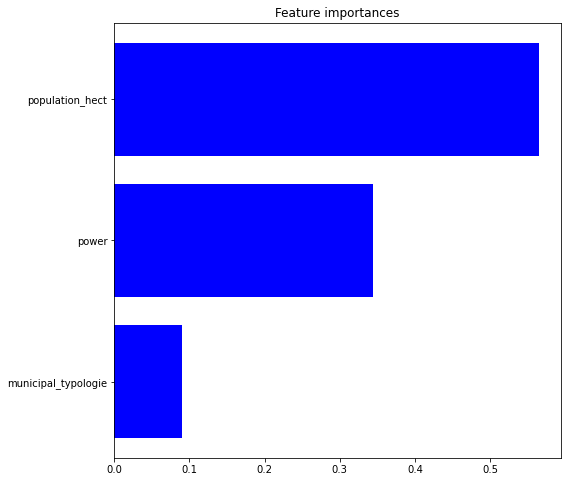

In [10]:
rfNa = ExtraTreesRegressor()
rfNa.fit(X_dfNa, y_dfNa)
plot_feature_importances(rfNa.feature_importances_, X_dfNa.columns)

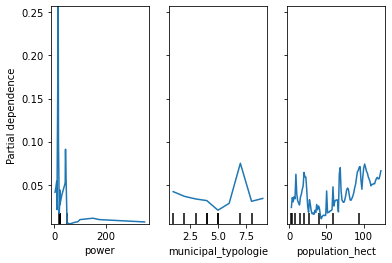

In [11]:
# feature dependence plot
plot_partial_dependence(
    rfNa,
    X_dfNa,
    features=['power', 'municipal_typologie', 'population_hect'])

figNa = plt.gcf()
figNa.subplots_adjust(hspace=0.8)
plt.show()

### With other Status

In [12]:
pcmf2 = pd.read_csv('public_chargers_metrics_and_features_2.csv', sep=',', encoding='utf8', index_col=0)  
pcmf2

,operatorname,geom,lat,lng,num_occupied,num_tot,power,municipal_typologie,population_hect,occupied_ratio
evseid,,,,,,,,,,
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,9,10873,60.00,3,8,0.000828
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,9,10873,60.00,3,9,0.000828
CH*SWIEE31688,Swisscharge,010100002008080000AE86C9D0C292444192984FA766B3...,1.225575e+06,2.696582e+06,9,10873,60.00,3,8,0.000828
CH*E4U*E00574,easy4you,010100002008080000B202F8EECBC5444158190D944FA4...,1.221712e+06,2.722712e+06,0,2871,22.08,7,3,0.000000
CH*E4U*E00574,easy4you,010100002008080000B202F8EECBC5444158190D944FA4...,1.221712e+06,2.722712e+06,0,2871,22.08,7,3,0.000000
...,...,...,...,...,...,...,...,...,...,...
CH*SWIEE11107,Swisscharge,010100002008080000789AA1C764004541028DB85EC2EE...,1.175234e+06,2.752714e+06,29,18869,150.00,6,44,0.001537
CH*SWIEE11107,Swisscharge,010100002008080000789AA1C764004541028DB85EC2EE...,1.175234e+06,2.752714e+06,29,18869,150.00,6,44,0.001537
CH*CCI*E20048,Move,01010000200808000092F2684C5F6043419D413BAF1C04...,1.180701e+06,2.539711e+06,215,18420,22.00,4,23,0.011672


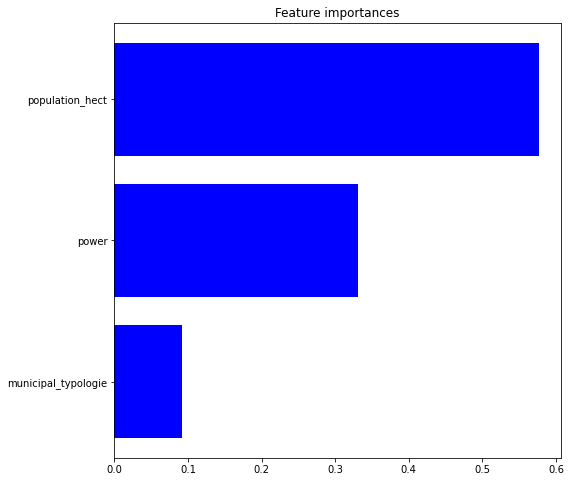

In [13]:
y_df2 = pcmf2.loc[:, 'occupied_ratio']     # extract occupied_ratio
X_df2 = pcmf2.loc[:, ['power', 'municipal_typologie', 'population_hect']]
y_df2 = y_df2.fillna(0)
X_df2['power'] = X_df2['power'].fillna(-1)
#X_df['power'] = X_df['power'].fillna(0)
#X_df['municipal_typologie'] = X_df['municipal_typologie'].fillna(-1)
#X_df['population_hect'] = X_df['population_hect'].fillna(-1)

#rf = RandomForestRegressor()
rf2 = ExtraTreesRegressor()
rf2.fit(X_df2, y_df2)
plot_feature_importances(rf2.feature_importances_, X_df2.columns)

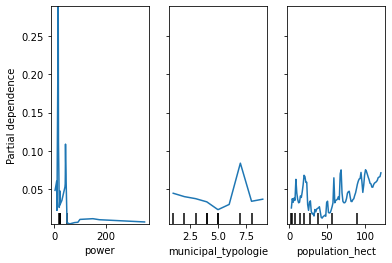

In [14]:
# feature dependence plot
plot_partial_dependence(
    rf2,
    X_df2,
    features=['power', 'municipal_typologie', 'population_hect'])

fig2 = plt.gcf()
fig2.subplots_adjust(hspace=0.8)
plt.show()

## All Plots

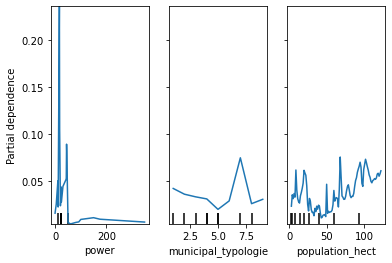

In [15]:
fig

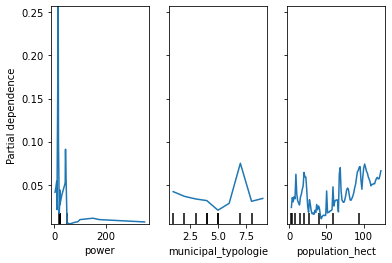

In [16]:
figNa

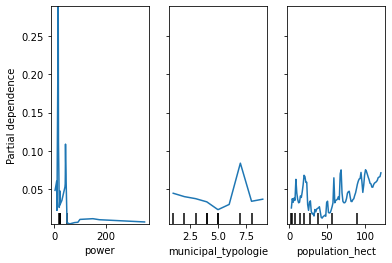

In [17]:
fig2